In [19]:

# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline




In [20]:
# 📁 Load real dataset
df = pd.read_csv("ice_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()
df.head()


,Extent
Date,
2010-01-01,10.20
2010-02-01,10.11
2010-03-01,10.59
2010-04-01,11.09
2010-05-01,10.53


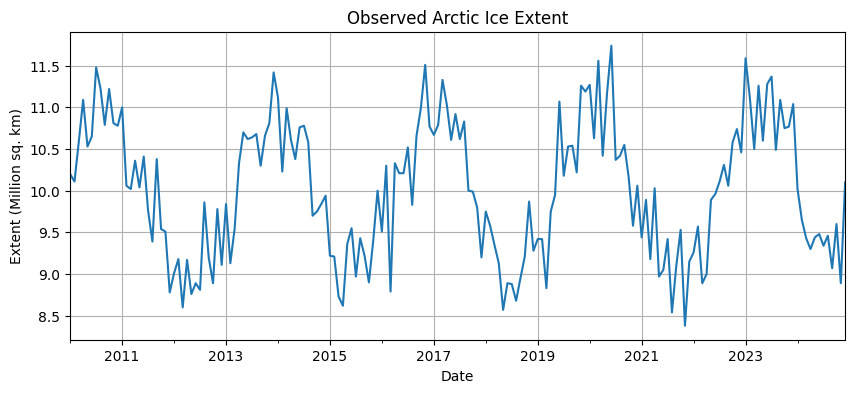

In [21]:
# 📊 Resample monthly average if needed (this assumes monthly data is clean)
monthly_df = df['Extent'].resample('M').mean()

# Plot observed data
monthly_df.plot(title="Observed Arctic Ice Extent", figsize=(10,4))
plt.ylabel("Extent (Million sq. km)")
plt.grid(True)
plt.show()


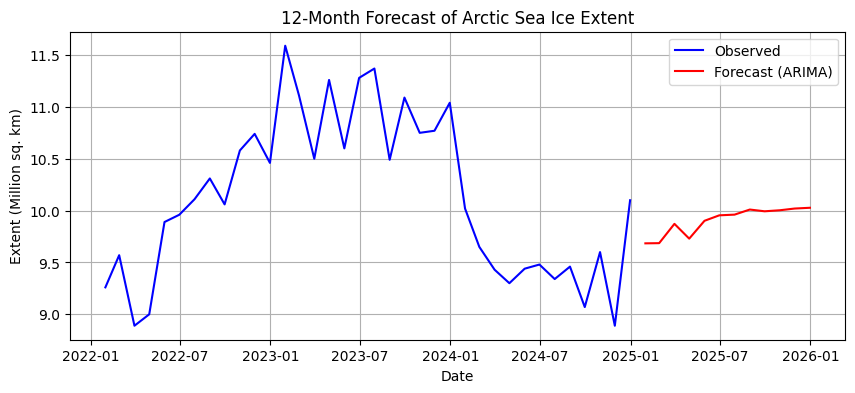

In [22]:

# 🤖 Apply ARIMA forecasting model
model = ARIMA(monthly_df, order=(5, 1, 2))
result = model.fit()
forecast = result.forecast(steps=12)

# 📅 Future date range for 12 months
pd.date_range(monthly_df.index[-1] + pd.DateOffset(months=1), periods=12, freq='ME')


# 📈 Plot forecast
plt.figure(figsize=(10,4))
plt.plot(monthly_df.index[-36:], monthly_df.values[-36:], label='Observed', color='blue')
plt.plot(future_index, forecast, label='Forecast (ARIMA)', color='red')
plt.title("12-Month Forecast of Arctic Sea Ice Extent")
plt.xlabel("Date")
plt.ylabel("Extent (Million sq. km)")
plt.grid(True)
plt.legend()
plt.show()
